In [6]:
pip install libpysal

     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
      --------------------------------------- 0.0/2.4 MB 187.9 kB/s eta 0:00:13
      --------------------------------------- 0.0/2.4 MB 219.4 kB/s eta 0:00:11
     - -------------------------------------- 0.1/2.4 MB 353.1 kB/s eta 0:00:07
     - -------------------------------------- 0.1/2.4 MB 409.6 kB/s eta 0:00:06
     --- ------------------------------------ 0.2/2.4 MB 622.7 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.4 MB 716.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.3/2.4 MB 827.2 kB/s eta 0:00:03
     ------ --------------------------------- 0.4/2.4 MB 796.7 kB/s eta 0:00:03
     ------ --------------------------------- 0.4/2.4 MB 796.7 kB/s eta 0:00:03
     -------- ------------------------------- 0.5/2.4 MB 906.4 kB/s

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shapely.geometry as geom
import mapclassify as mc
import json
import libpysal as lp
import shapely.geometry as shp

In [4]:
data0=pd.read_csv("C:/Users/VINCENT KIPRUTO/Documents/Final Year Project😎/Data/wfp_food_prices_kenya.csv")
county=gpd.read_file(r'C:\Users\VINCENT KIPRUTO\Documents\Final Year Project😎\Data\Kenya data\kenyadata\counties.shp')
towns=gpd.read_file(r'C:\Users\VINCENT KIPRUTO\Documents\Final Year Project😎\Data\Kenya data\kenyadata\towns.shp')

## Data Cleaning

In [6]:
data0

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,7/15/2022,Nyanza,Kisumu,Kisumu,-0.1,34.75,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0,0
14447,7/15/2022,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),0.516667,35.283333,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0,0
14448,8/15/2022,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0,0
14449,8/15/2022,Nyanza,Kisumu,Kisumu,-0.1,34.75,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0,0


In [7]:
data=data0[data0['priceflag']=='actual']

In [8]:
data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.2355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,pulses and nuts,Beans (rosecoco),90 KG,actual,Wholesale,KES,9432,79.3939
9976,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Cabbage,126 KG,actual,Wholesale,KES,2007.18,16.8955
9977,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Kale,50 KG,actual,Wholesale,KES,1385,11.6582
9978,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Onions (dry),13 KG,actual,Wholesale,KES,643.5,5.4167


In [9]:
data.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(9979, 14)

## Converting csv to shp

In [12]:
#Create geodataframe
dataset=gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

#Specifying CRS. Obtain the Well Known Text(WKT) from EPSG.IO site, type the code of WGS 1984 i.e for Kenya and you will get the WKT
ESRI_WKT='GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'
#save in shp format 
dataset.to_file(filename='food_prices.shp', driver='ESRI Shapefile', crs=ESRI_WKT)

In [13]:
dataset

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,POINT (39.66667 -4.05000)
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041,POINT (39.66667 -4.05000)
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,POINT (39.66667 -4.05000)
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705,POINT (39.66667 -4.05000)
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.2355,POINT (38.01667 -1.36667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,pulses and nuts,Beans (rosecoco),90 KG,actual,Wholesale,KES,9432,79.3939,POINT (35.07665 1.25309)
9976,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Cabbage,126 KG,actual,Wholesale,KES,2007.18,16.8955,POINT (35.07665 1.25309)
9977,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Kale,50 KG,actual,Wholesale,KES,1385,11.6582,POINT (35.07665 1.25309)
9978,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Onions (dry),13 KG,actual,Wholesale,KES,643.5,5.4167,POINT (35.07665 1.25309)


In [14]:
county.head()

,CountyCode,CountyName,geometry
0,1,Mombasa,"POLYGON ((39.67418 -3.92338, 39.67519 -3.92380..."
1,2,Kwale,"POLYGON ((39.31842 -3.56684, 39.31853 -3.56684..."
2,3,Kilifi,"POLYGON ((39.89294 -2.31154, 39.89310 -2.31175..."
3,4,Tana River,"POLYGON ((39.04823 -0.00770, 39.04929 -0.00794..."
4,5,Lamu,"POLYGON ((41.11654 -2.35219, 40.80636 -2.59785..."


<AxesSubplot: >

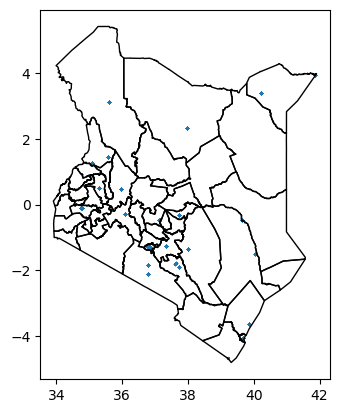

In [15]:
#plot county and dataset together
ax=dataset.plot(markersize=1.5)
county.plot(ax=ax, facecolor='none')

In [ ]:
#mombasa=dataset.loc[dataset['admin1']=='Coast', 'geometry'].squeeze()
#mombasa

In [ ]:
towns.head()

In [ ]:
dataset.head()

In [16]:
towns.head()

,TName,geometry
0,edwata,POINT Z (36.96590 -1.91909 94155.98943)
1,kaitorori,POINT Z (36.99332 -1.89706 90289.34237)
2,enkaroni,POINT Z (36.74086 -2.04415 95232.90283)
3,KMQ,POINT Z (36.69359 -1.92619 93045.42852)
4,TUALA,POINT Z (36.80861 -1.40528 96625.73617)


In [17]:
join=gpd.sjoin(towns, dataset, op='within', how='left')
join

C:\Users\VINCENT KIPRUTO\.conda\envs\geo_env\Lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\VINCENT KIPRUTO\AppData\Local\Temp\ipykernel_6720\1806822147.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...
Right CRS: None

  join=gpd.sjoin(towns, dataset, op='within', how='left')


,TName,geometry,index_right,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,edwata,POINT Z (36.96590 -1.91909 94155.98943),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kaitorori,POINT Z (36.99332 -1.89706 90289.34237),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enkaroni,POINT Z (36.74086 -2.04415 95232.90283),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KMQ,POINT Z (36.69359 -1.92619 93045.42852),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TUALA,POINT Z (36.80861 -1.40528 96625.73617),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,mbwanjumale,POINT Z (41.13635 -2.08100 477.69189),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,KIPINI,POINT Z (40.52808 -2.52559 722.50619),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,NANIGHI,POINT Z (39.86986 -0.85821 6203.94594),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,mandani,POINT Z (39.64935 -3.83953 12118.94792),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dataset.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,POINT (39.66667 -4.05000)
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041,POINT (39.66667 -4.05000)
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,POINT (39.66667 -4.05000)
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705,POINT (39.66667 -4.05000)
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.2355,POINT (38.01667 -1.36667)


In [19]:
#dataset.plot(column='market')
#county.plot(ax=ax, facecolor='none')
dataset.shape

(9979, 15)

## Converting Point to Polygons

In [20]:
dataset1=dataset.buffer(0.126, cap_style=3)
dataset1

1       POLYGON ((39.79267 -3.92400, 39.79267 -4.17600...
2       POLYGON ((39.79267 -3.92400, 39.79267 -4.17600...
3       POLYGON ((39.79267 -3.92400, 39.79267 -4.17600...
4       POLYGON ((39.79267 -3.92400, 39.79267 -4.17600...
5       POLYGON ((38.14267 -1.24067, 38.14267 -1.49267...
                              ...                        
9975    POLYGON ((35.20265 1.37909, 35.20265 1.12709, ...
9976    POLYGON ((35.20265 1.37909, 35.20265 1.12709, ...
9977    POLYGON ((35.20265 1.37909, 35.20265 1.12709, ...
9978    POLYGON ((35.20265 1.37909, 35.20265 1.12709, ...
9979    POLYGON ((35.20265 1.37909, 35.20265 1.12709, ...
Length: 9979, dtype: geometry

In [19]:
dataset1=dataset.copy()
dataset1.geometry=dataset1.geometry.apply(lambda x: x.buffer(0.126, cap_style=3))
dataset1

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,"POLYGON ((39.79267 -3.92400, 39.79267 -4.17600..."
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041,"POLYGON ((39.79267 -3.92400, 39.79267 -4.17600..."
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,"POLYGON ((39.79267 -3.92400, 39.79267 -4.17600..."
4,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705,"POLYGON ((39.79267 -3.92400, 39.79267 -4.17600..."
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.2355,"POLYGON ((38.14267 -1.24067, 38.14267 -1.49267..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,pulses and nuts,Beans (rosecoco),90 KG,actual,Wholesale,KES,9432,79.3939,"POLYGON ((35.20265 1.37909, 35.20265 1.12709, ..."
9976,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Cabbage,126 KG,actual,Wholesale,KES,2007.18,16.8955,"POLYGON ((35.20265 1.37909, 35.20265 1.12709, ..."
9977,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Kale,50 KG,actual,Wholesale,KES,1385,11.6582,"POLYGON ((35.20265 1.37909, 35.20265 1.12709, ..."
9978,10/15/2022,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Onions (dry),13 KG,actual,Wholesale,KES,643.5,5.4167,"POLYGON ((35.20265 1.37909, 35.20265 1.12709, ..."


## Data classification

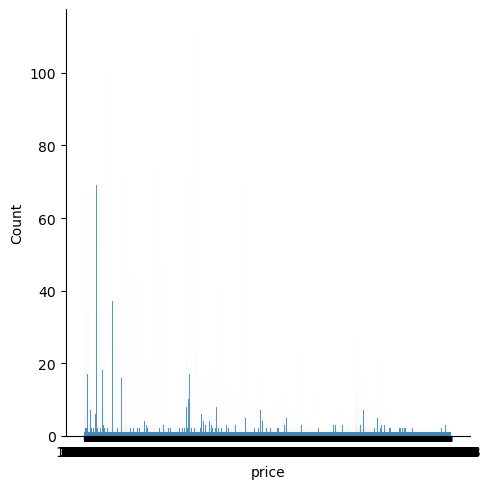

In [20]:
sns.displot(dataset1['price'])

In [23]:
#dataset1.plot(column='price', k=4, legend=True)

In [24]:
#ax=plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
#dataset1.plot(column='price', scheme='Quantiles', ax=ax)

In [25]:
mc.CLASSIFIERS

('BoxPlot',
 'EqualInterval',
 'FisherJenks',
 'FisherJenksSampled',
 'HeadTailBreaks',
 'JenksCaspall',
 'JenksCaspallForced',
 'JenksCaspallSampled',
 'MaxP',
 'MaximumBreaks',
 'NaturalBreaks',
 'Quantiles',
 'Percentiles',
 'StdMean',
 'UserDefined')

In [26]:
cl=dataset1['price']
#inter=mc.EqualInterval(cl, k=5)

In [27]:
str(dataset1.columns.tolist())

"['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice', 'geometry']"

# Converting Json to Geojson

In [28]:
def dataset1_to_geojson(dataset1, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in dataset1.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Polygon',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [32]:
#cols = ['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice', 'geometry']
#geojson = dataset1_to_geojson(dataset1, cols)
#geojson

In [30]:
fp=gpd.GeoDataFrame(geojson)

<AxesSubplot: >

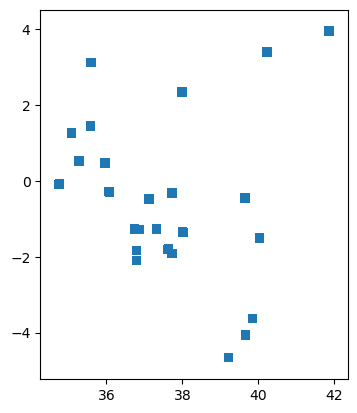

In [21]:
dataset1.plot()